In [ ]:
from sklearn.decomposition import PCA

# Separate features (X) and target (y)
# We use df_encoded which has handled missing values, encoded categorical features, and scaled numerical features.
X = df_encoded.drop('num', axis=1)
y = df_encoded['num']

# Apply PCA
# We'll start by applying PCA without specifying the number of components
# to analyze the explained variance.
pca = PCA()
X_pca = pca.fit_transform(X)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Display the explained variance ratio and cumulative explained variance ratio
display(pd.DataFrame({'Explained Variance Ratio': explained_variance_ratio,
                      'Cumulative Explained Variance Ratio': cumulative_explained_variance_ratio}))

,Explained Variance Ratio,Cumulative Explained Variance Ratio
0,0.267296,0.267296
1,0.157392,0.424688
2,0.121541,0.546229
3,0.107983,0.654213
4,0.069634,0.723846
5,0.047996,0.771842
6,0.034870,0.806712
7,0.032616,0.839328
8,0.028254,0.867582
9,0.025177,0.892759


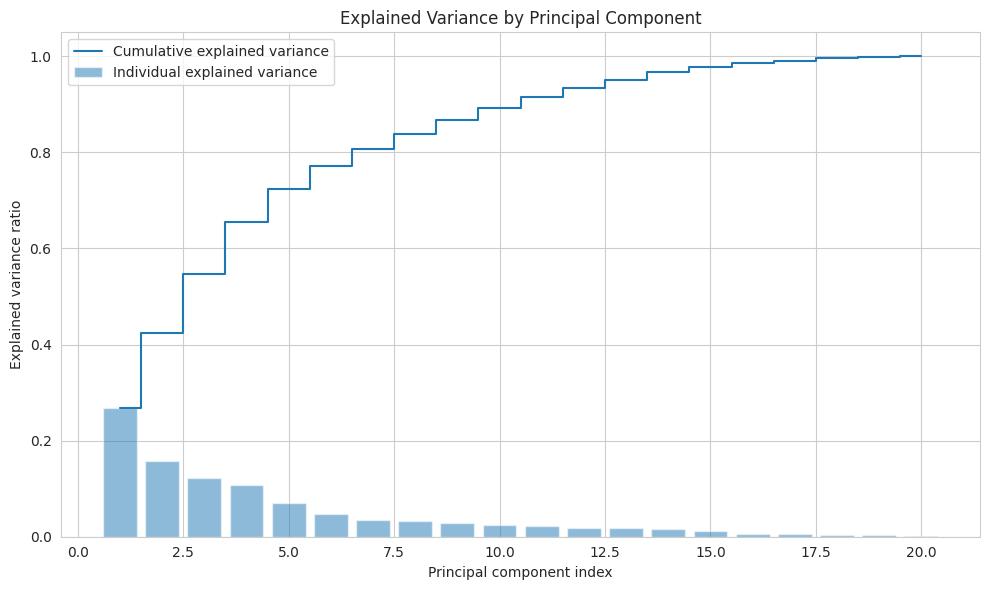

In [ ]:
# Plot the explained variance ratio per component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Explained Variance by Principal Component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

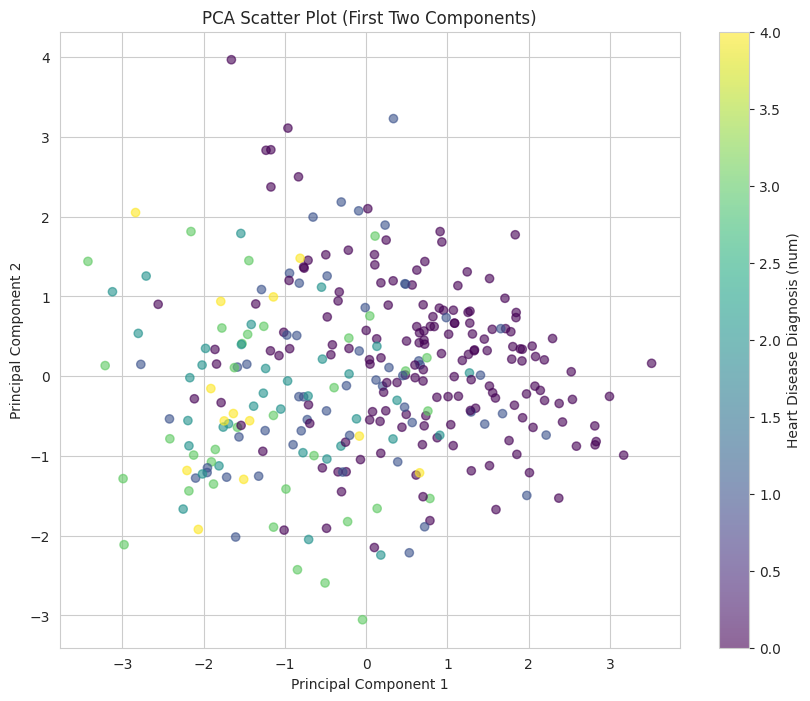

In [ ]:
# Visualize PCA results (scatter plot for the first two components)
# Since the target variable 'num' has multiple classes (0, 1, 2, 3, 4), we can color the scatter plot by these classes.
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot (First Two Components)')
plt.colorbar(scatter, label='Heart Disease Diagnosis (num)')
plt.grid(True)
plt.show()